https://colab.research.google.com/#create=true&language=r, or this short URL https://colab.to/r

***THE dplyr PACKAGE***

In [ ]:
R.version.string

[1] "R version 4.1.1 (2021-08-10)"

In [ ]:
install.packages("dplyr")
library(dplyr)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(datasets)
data(iris)
summary(iris)
summary(iris$Species)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

setosa versicolor  virginica 
        50         50         50

In [ ]:
names(iris) <- tolower(names(iris))
virginica <- filter(iris, species == "virginica")
head(virginica) # This dispalys the first six rows

,sepal.length,sepal.width,petal.length,petal.width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6.3,3.3,6.0,2.5,virginica
2,5.8,2.7,5.1,1.9,virginica
3,7.1,3.0,5.9,2.1,virginica
4,6.3,2.9,5.6,1.8,virginica
5,6.5,3.0,5.8,2.2,virginica
6,7.6,3.0,6.6,2.1,virginica


In [ ]:
sepalLength6 <- filter(iris, species == "virginica", sepal.length > 6)
tail(sepalLength6) # compare this to head()

,sepal.length,sepal.width,petal.length,petal.width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
36,6.8,3.2,5.9,2.3,virginica
37,6.7,3.3,5.7,2.5,virginica
38,6.7,3.0,5.2,2.3,virginica
39,6.3,2.5,5.0,1.9,virginica
40,6.5,3.0,5.2,2.0,virginica
41,6.2,3.4,5.4,2.3,virginica


In [ ]:
sepal_subset <- subset(iris, species == "virginica" & sepal.length > 6)
tail(sepal_subset)

,sepal.length,sepal.width,petal.length,petal.width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [ ]:
# select() the specified columns
selected <- select(iris, sepal.length, sepal.width, petal.length)
# select all columns from sepal.length to petal.length
selected2 <- select(iris, sepal.length:petal.length)
head(selected, 3)

,sepal.length,sepal.width,petal.length
,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3


In [ ]:
subset(iris, Species == "virginica")[1:5,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica
104,6.3,2.9,5.6,1.8,virginica
105,6.5,3.0,5.8,2.2,virginica


In [ ]:
# selected and selected2 are exactly the same
identical(selected, selected2)

[1] TRUE

In [ ]:
# create a new column that stores logical values for sepal.width greater than half of sepal.length
newCol <- mutate(iris, greater.half = sepal.width > 0.5 * sepal.length)
tail(newCol)

,sepal.length,sepal.width,petal.length,petal.width,species,greater.half
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
145,6.7,3.3,5.7,2.5,virginica,FALSE
146,6.7,3.0,5.2,2.3,virginica,FALSE
147,6.3,2.5,5.0,1.9,virginica,FALSE
148,6.5,3.0,5.2,2.0,virginica,FALSE
149,6.2,3.4,5.4,2.3,virginica,TRUE
150,5.9,3.0,5.1,1.8,virginica,TRUE


In [ ]:
# arrange()
newCol <- arrange(newCol, petal.width)
head(newCol)

,sepal.length,sepal.width,petal.length,petal.width,species,greater.half
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
1,4.9,3.1,1.5,0.1,setosa,TRUE
2,4.8,3.0,1.4,0.1,setosa,TRUE
3,4.3,3.0,1.1,0.1,setosa,TRUE
4,5.2,4.1,1.5,0.1,setosa,TRUE
5,4.9,3.6,1.4,0.1,setosa,TRUE
6,5.1,3.5,1.4,0.2,setosa,TRUE


In [ ]:
# The chain operator, or the pipeline %>%
# This will first filter, and then arrange our data. Note that here the order in which you call functions does not matter, but in other cases it might
arr.virg <- newCol %>% filter(species == "virginica") %>%
  arrange(sepal.width)
arr.virg[30:35,] # will show us rows 30 through 35 and all columns

,sepal.length,sepal.width,petal.length,petal.width,species,greater.half
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
30,6.8,3.0,5.5,2.1,virginica,FALSE
31,6.5,3.0,5.8,2.2,virginica,FALSE
32,7.7,3.0,6.1,2.3,virginica,FALSE
33,6.7,3.0,5.2,2.3,virginica,FALSE
34,6.4,3.1,5.5,1.8,virginica,FALSE
35,6.9,3.1,5.4,2.1,virginica,FALSE


In [ ]:
# You can also arrange in descending order using desc() on what you arrange by
# arrange(desc(sepal.width))
# summarise()
summarise(arr.virg, mean.length = mean(sepal.length, na.rm = TRUE))

mean.length
<dbl>
6.588


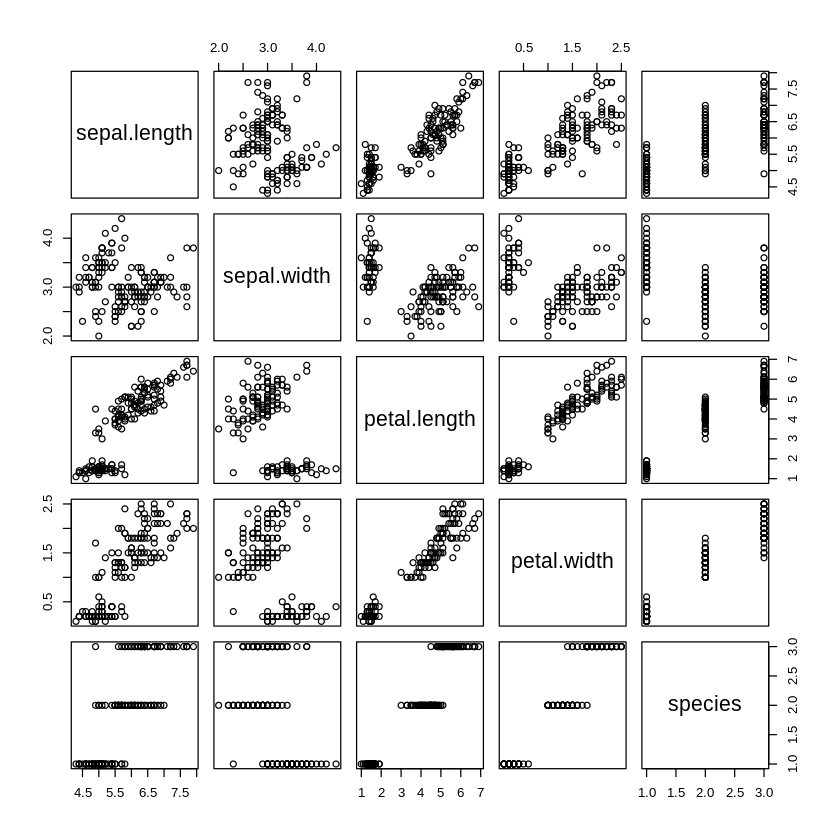

In [ ]:
plot(iris)

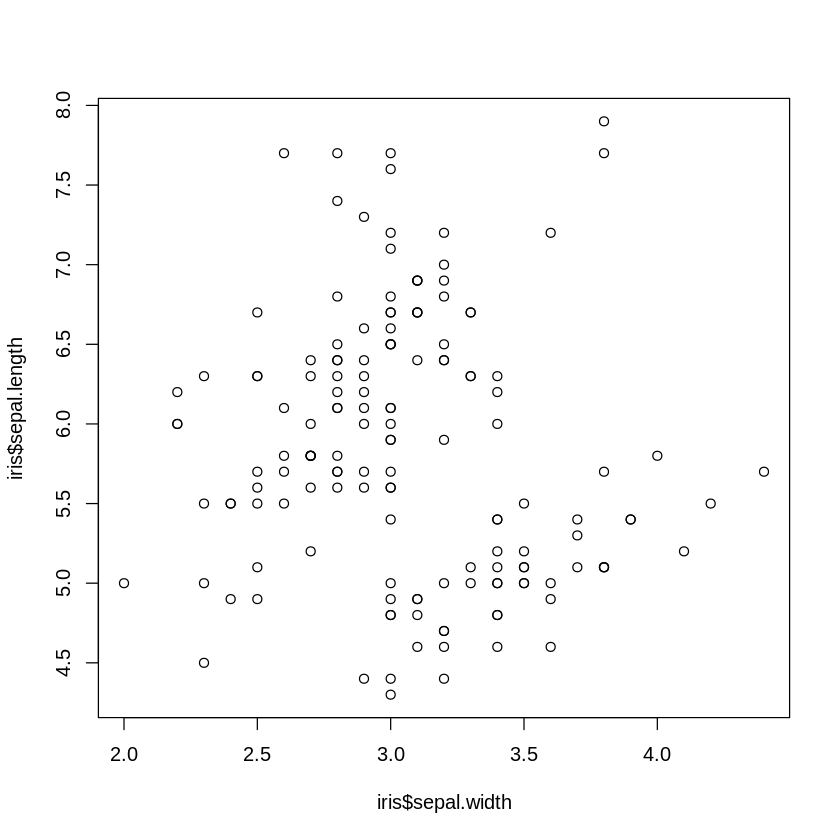

In [ ]:
# use ?plot to read more about other arguments
plot(iris$sepal.width, iris$sepal.length)

In [ ]:
?filter()

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

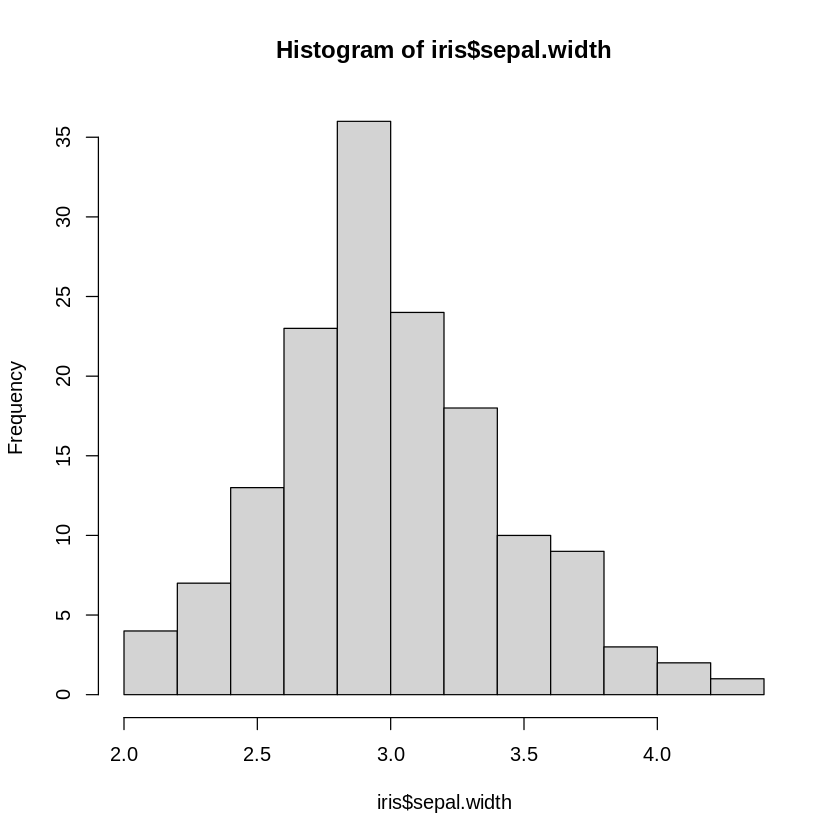

In [ ]:
# ?hist will give you details on more arguments
hist(iris$sepal.width)

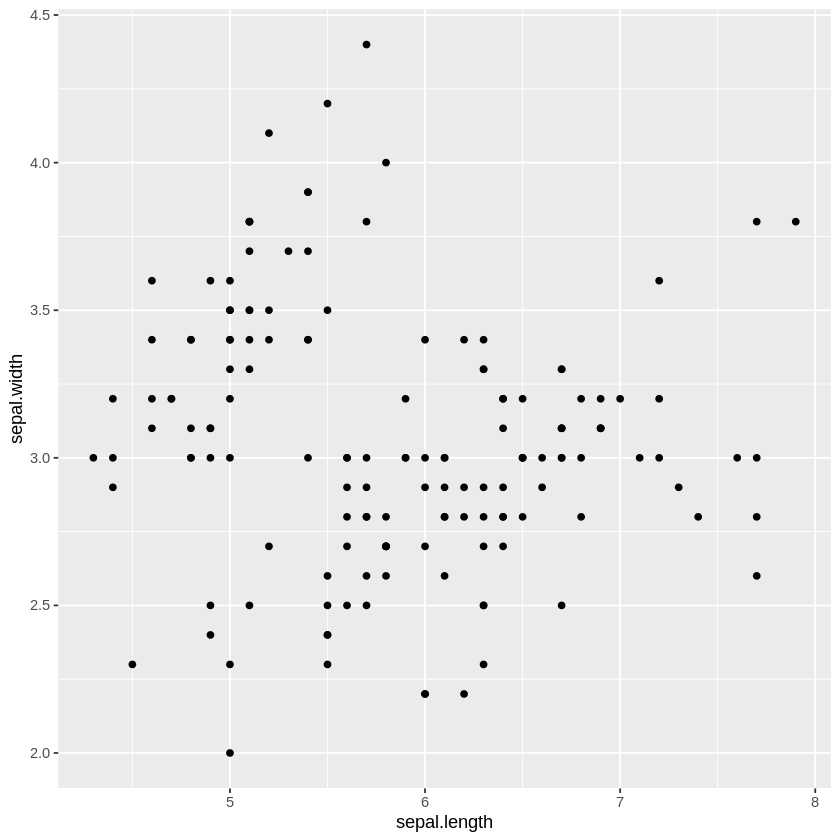

In [ ]:
# Create a scatterplot of speed v/s distance
g <- ggplot(selected, aes(x=sepal.length, y=sepal.width)) + geom_point()
g

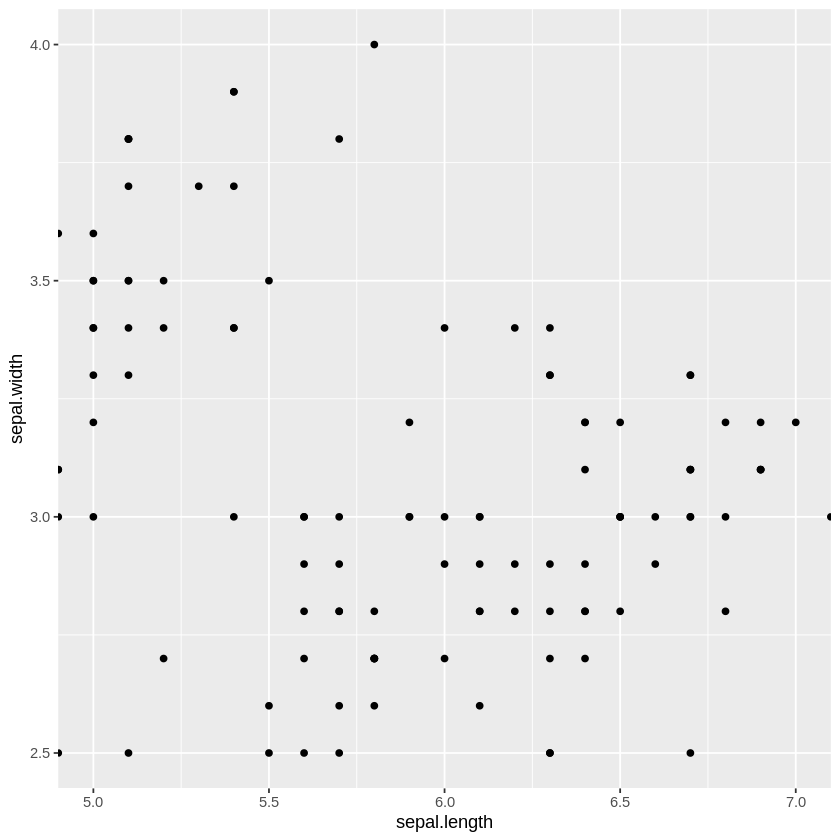

In [ ]:
#We could also zoom into a section of the graph by mentioning the coordinates

g_new <- g + coord_cartesian(xlim = c(5,7), ylim = c(2.5,4.0))
g_new

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



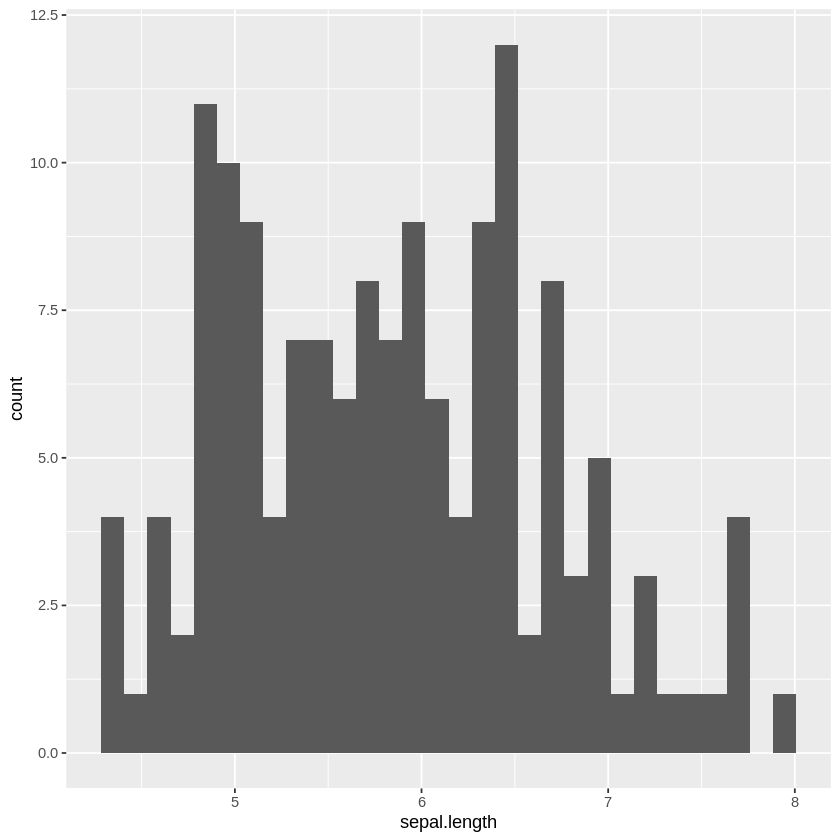

In [ ]:
#Create a basic histogram of the data with weight on x-axis, and a count of weight on y-axis

ggplot(selected, aes(x=sepal.length)) + geom_histogram()

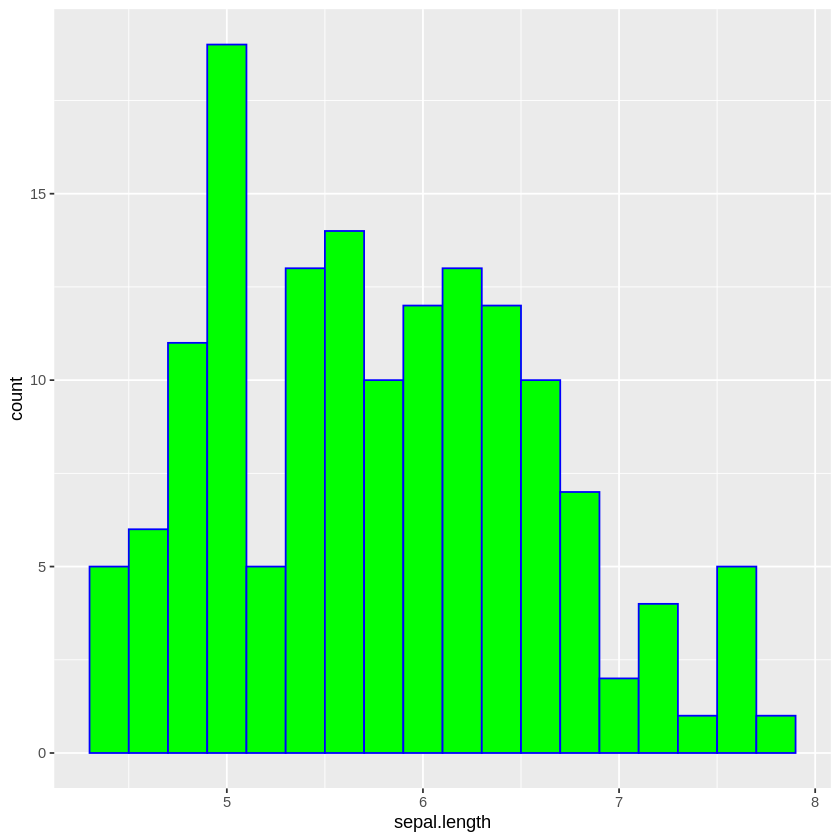

In [ ]:
#We could specify the bin-width, the outline color and the fill color of the histogram

g <- ggplot(selected, aes(x=sepal.length)) + geom_histogram(binwidth = 0.2, color="blue", fill="green")
g

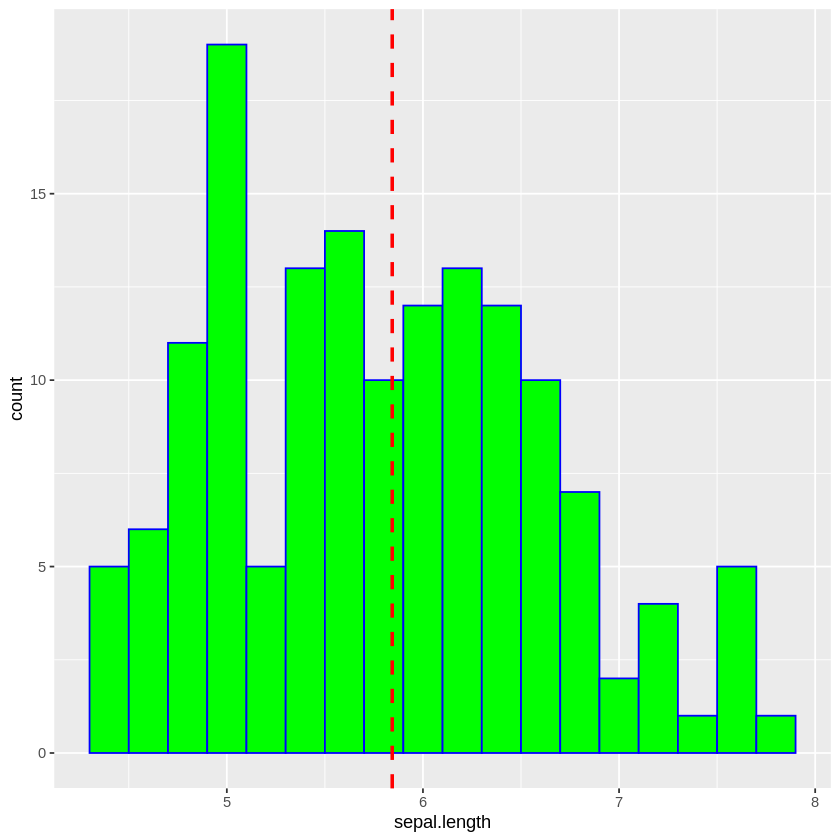

In [ ]:
#If we want to plot the mean of the vertical distribution, we could draw a vertical line

g + geom_vline(aes(xintercept=mean(sepal.length)), color="red", linetype="dashed", size=1)

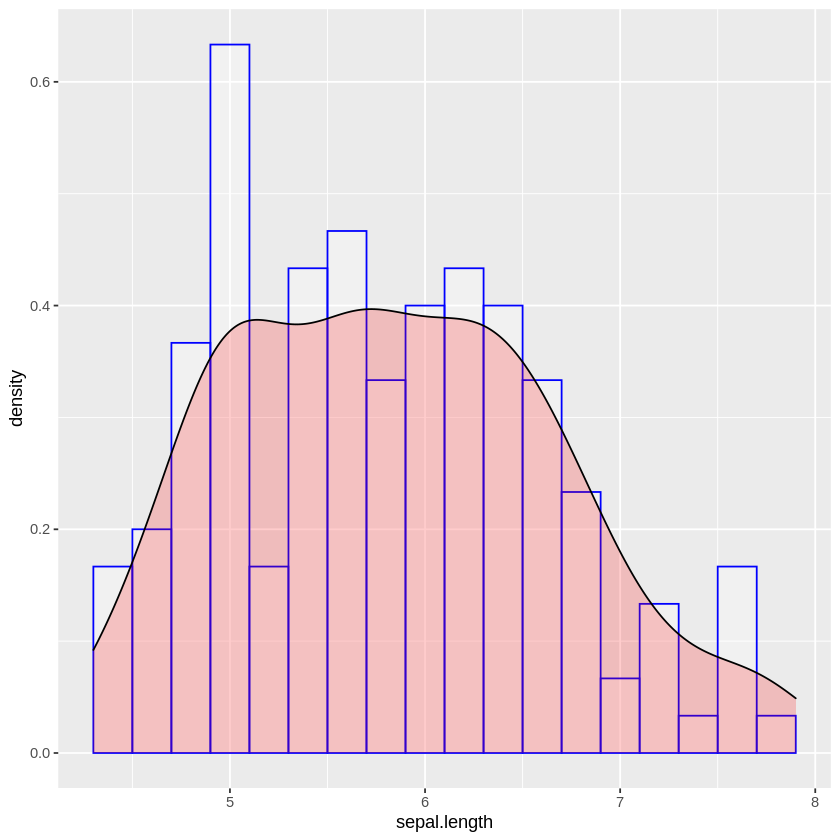

In [ ]:
#Density Plot
ggplot(selected, aes(x=sepal.length)) +
  geom_histogram(binwidth = 0.2, aes(y = ..density..), 
                 alpha=0.3, color="blue", fill="white") +
  geom_density(alpha=0.2, fill="red")

1.   geom_point() for scatter plots, dot plots, etc.
2.   geom_boxplot() for, well, boxplots!
3.   geom_line() for trend lines, time series, etc

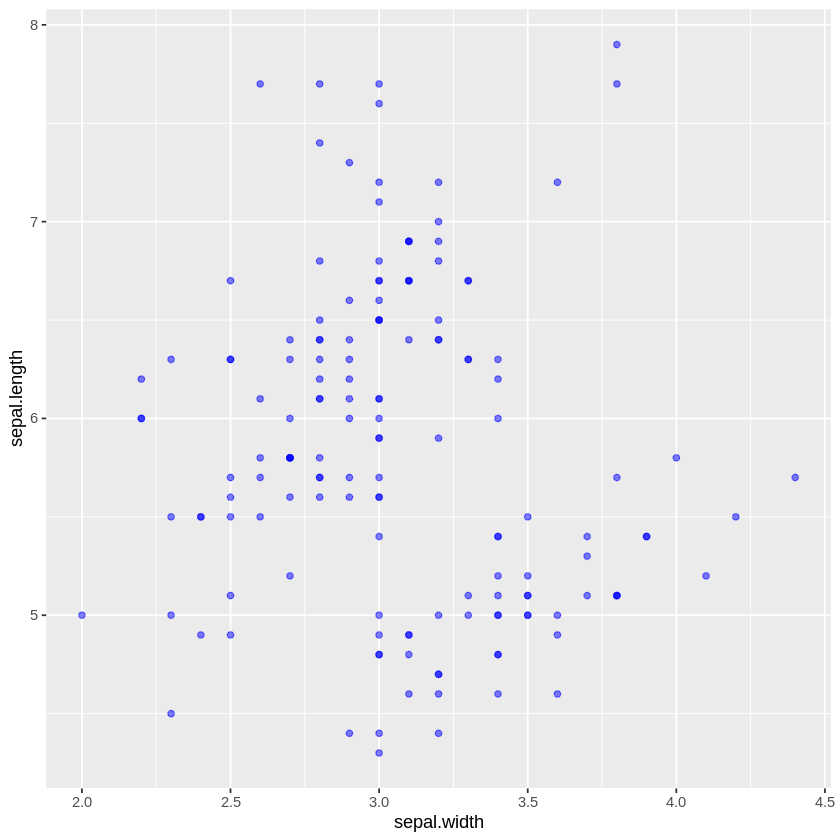

In [ ]:
ggplot(data = selected,mapping= aes(x = sepal.width, y = sepal.length)) +
  geom_point(alpha = 0.5, color = "blue")

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            5.1         3.5          1.4         0.2     setosa
2            4.9         3.0          1.4         0.2     setosa
3            4.7         3.2          1.3         0.2     setosa
51           7.0         3.2          4.7         1.4 versicolor
52           6.4         3.2          4.5         1.5 versicolor
53           6.9         3.1          4.9         1.5 versicolor
101          6.3         3.3          6.0         2.5  virginica
102          5.8         2.7          5.1         1.9  virginica
103          7.1         3.0          5.9         2.1  virginica


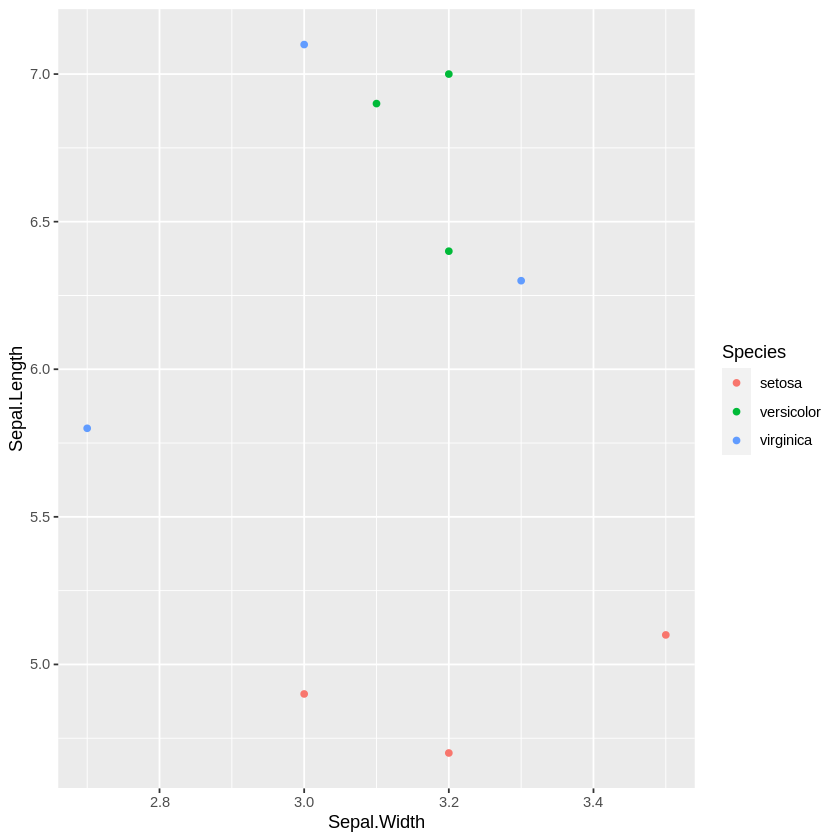

In [ ]:
newcases <- iris[c(1:3,51:53,101:103),]
print(newcases)
ggplot(data = newcases,mapping= aes(x = Sepal.Width, y = Sepal.Length)) +
  geom_point( aes(color = Species))

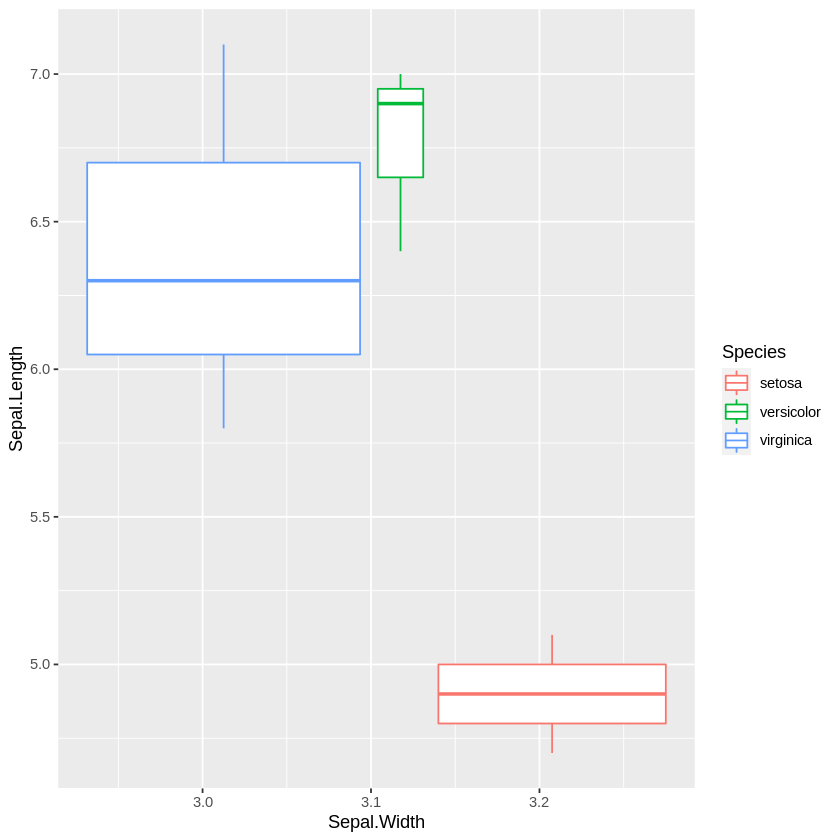

In [ ]:
ggplot(data = newcases,mapping= aes(x = Sepal.Width, y = Sepal.Length)) +
  geom_boxplot(aes(color = Species))

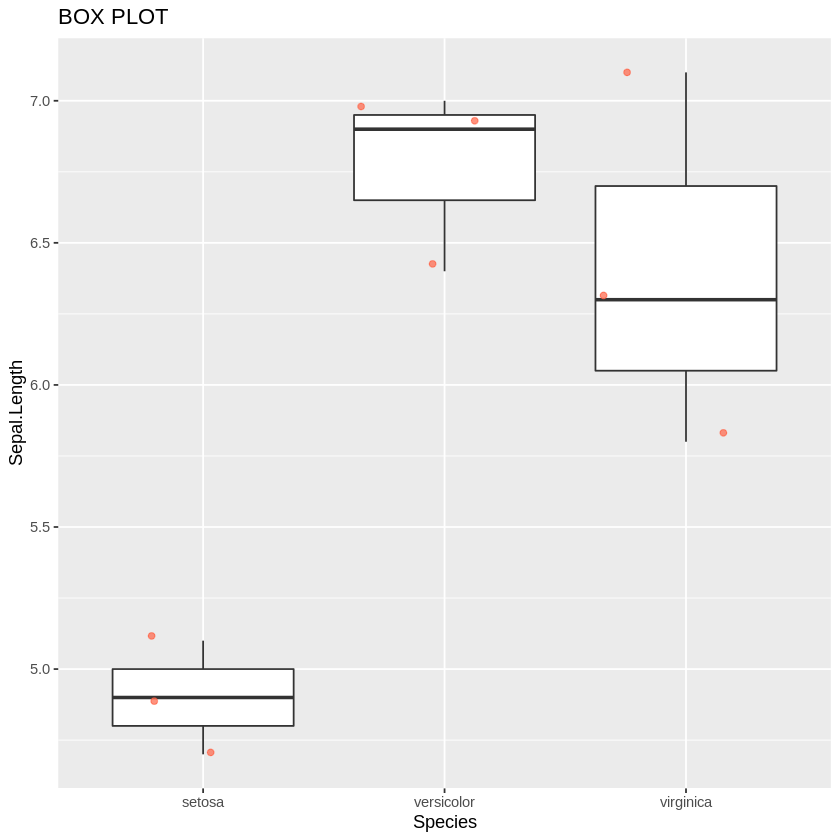

In [ ]:
ggplot(data = newcases,mapping= aes(x = Species, y = Sepal.Length)) +
  geom_boxplot() +
    geom_jitter(alpha = 0.7, color = "tomato") +
    labs(title="BOX PLOT") +
    theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
    )

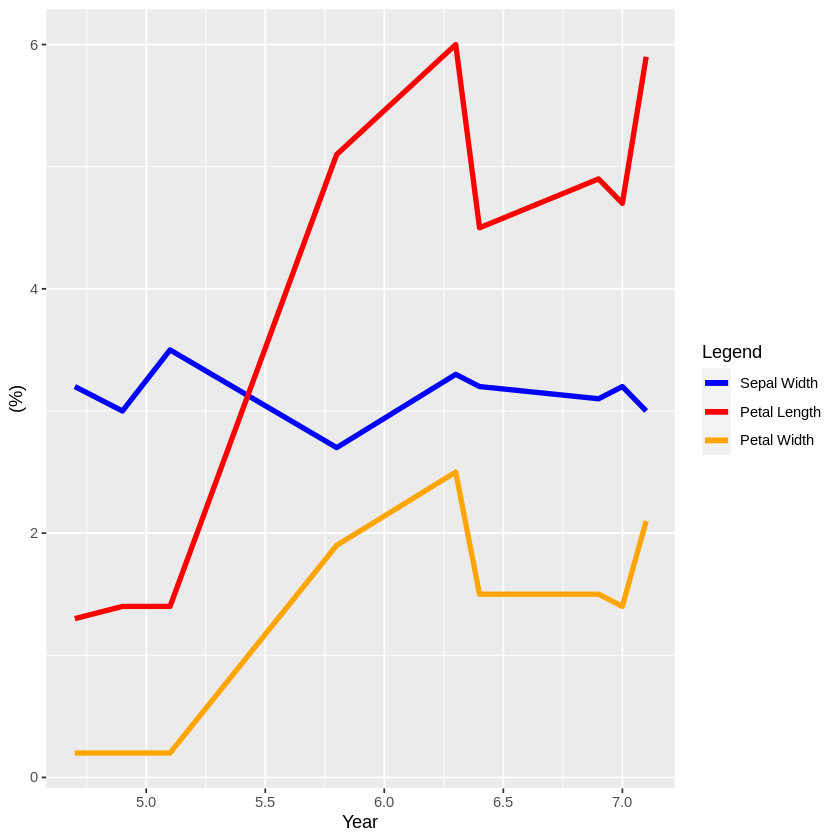

In [ ]:
colors <- c("Sepal Width" = "blue", "Petal Length" = "red", "Petal Width" = "orange")

ggplot(newcases, aes(x = Sepal.Length)) +
    geom_line(aes(y = Sepal.Width, color = "Sepal Width"), size = 1.5) +
    geom_line(aes(y = Petal.Length, color = "Petal Length"), size = 1.5) +
    geom_line(aes(y = Petal.Width, color = "Petal Width"), size = 1.5) +
    labs(x = "Year",
         y = "(%)",
         color = "Legend") +
    scale_color_manual(values = colors)

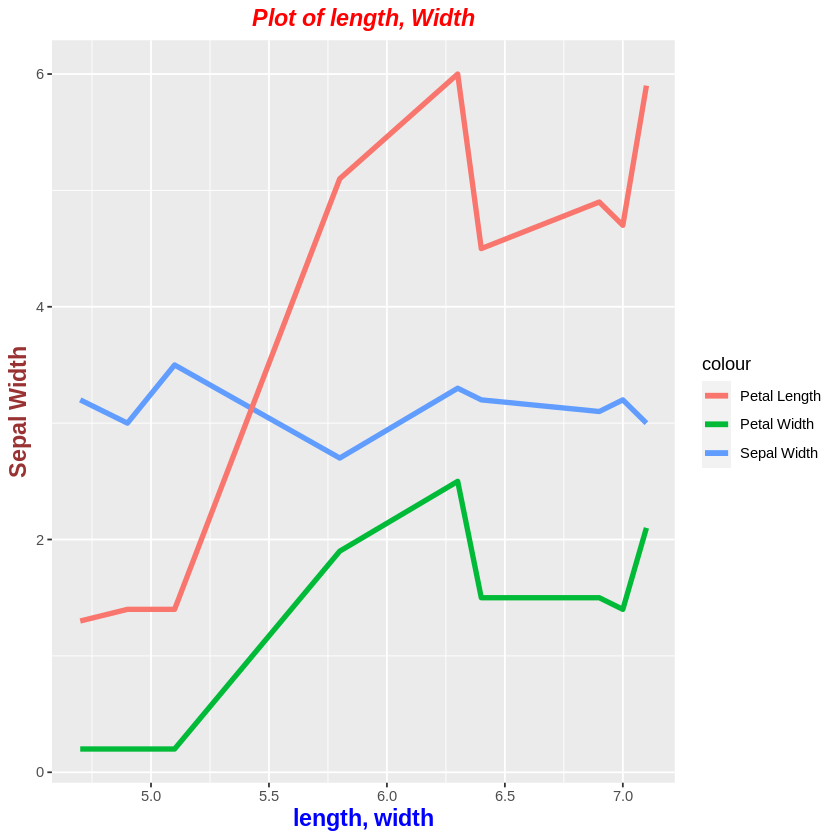

In [ ]:
p <- ggplot(newcases, aes(x = Sepal.Length)) +
    geom_line(aes(y = Sepal.Width, color = "Sepal Width"), size = 1.5) +
    geom_line(aes(y = Petal.Length, color = "Petal Length"), size = 1.5) +
    geom_line(aes(y = Petal.Width, color = "Petal Width"), size = 1.5)
p + ggtitle("Plot of length, Width") +
  xlab("length, width") + ylab("Sepal Width") +
   theme(
plot.title = element_text(color="red", size=14, face="bold.italic",hjust = 0.5),
axis.title.x = element_text(color="blue", size=14, face="bold"),
axis.title.y = element_text(color="#993333", size=14, face="bold")
)